In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
from hilbert_flatten import hilbert_flatten as flatten, hilbert_expand as expand

In [2]:
 def plt_im(X):
    '''Plots grayscale image X.'''
    
    plt.figure(figsize=(36, 21))
    plt.imshow(X, cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.show()

[0.55033843 0.53857373 0.54527804 ... 0.43353725 0.40974    0.42737569]


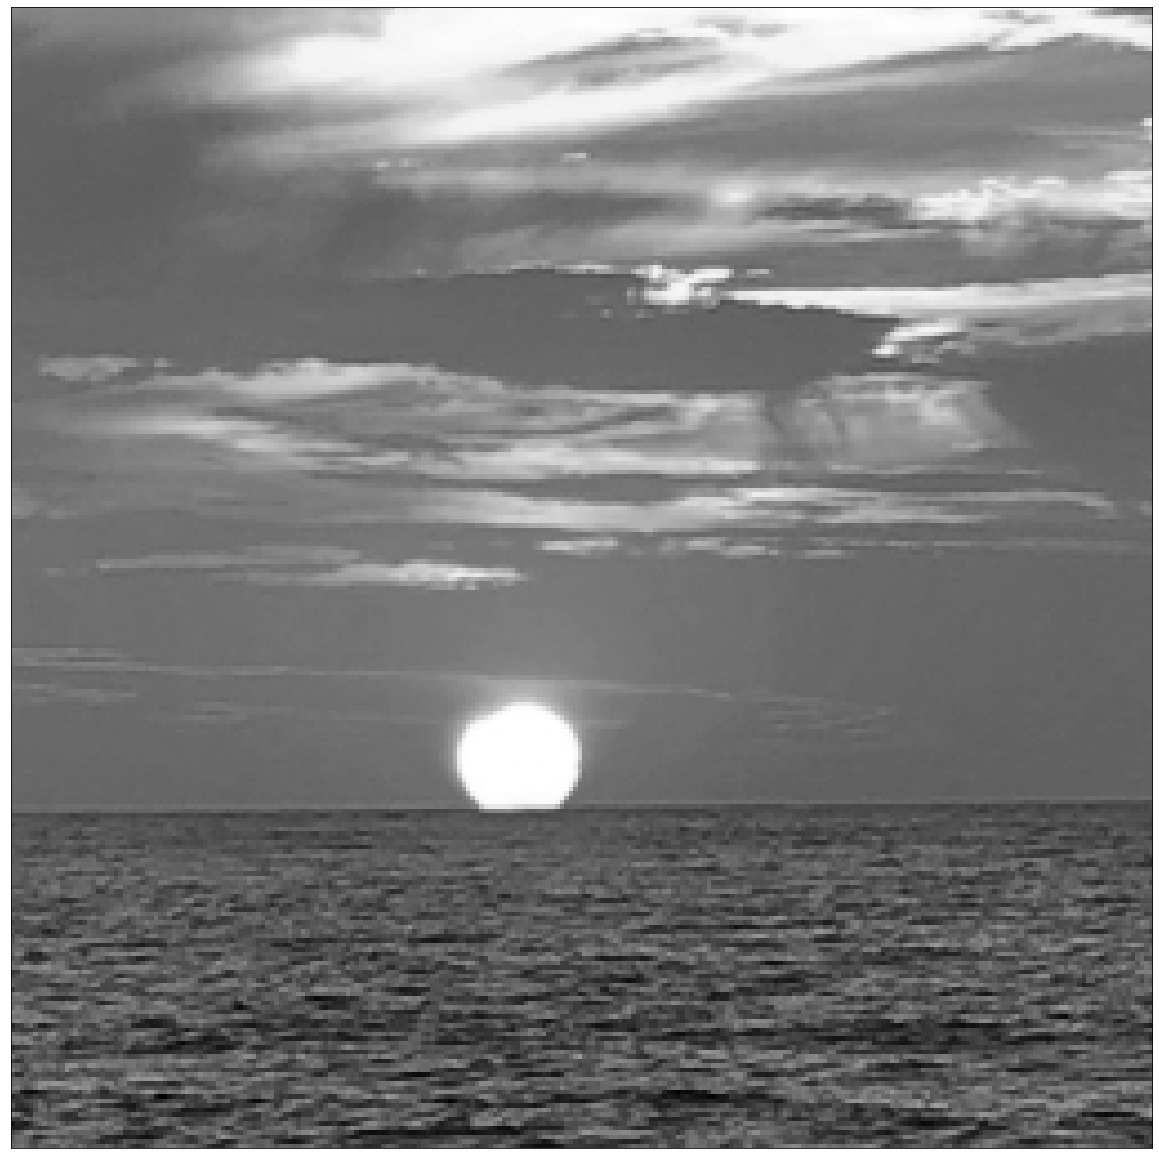

(256, 256)


In [3]:
# size is 256 * 256 pixels
img = io.imread('./data/sunset256.jpg')
img = color.rgb2gray(img)
# flatten the image with hilbert curve
flat = flatten(img)
print(flat)
plt_im(img)  # expand(flat, 2))
print(img.shape)

In [4]:
# my solution for convolution and pooling

def out_size(m_in, k, p, s):
    m_out = (m_in - k + 2*p) / s + 1
    m_floor = np.floor(m_out)
    
    if not np.isclose(m_out, m_floor):
        # raise ValueError(f'Expected integer as input: {m_out}')
        pass
        
    return int(m_floor)


    
def pool1(X, k=2, s=1, action=np.max):
    '''
    1 dim pooling
    '''
    
    X = np.array(X)
    w = X.shape[0]
    out = out_size(w, k, 0, s)
    O = np.zeros(out)
    
    for i in range(out):
        si = s * i
        O[i] = action(X[si:si+k])
            
    return O

In [5]:
# pool 1d , so that the output size is not 256*256 but 64*64
print(out_size(256**2, 16, 0, 16))
# this is the perfect output size

4096


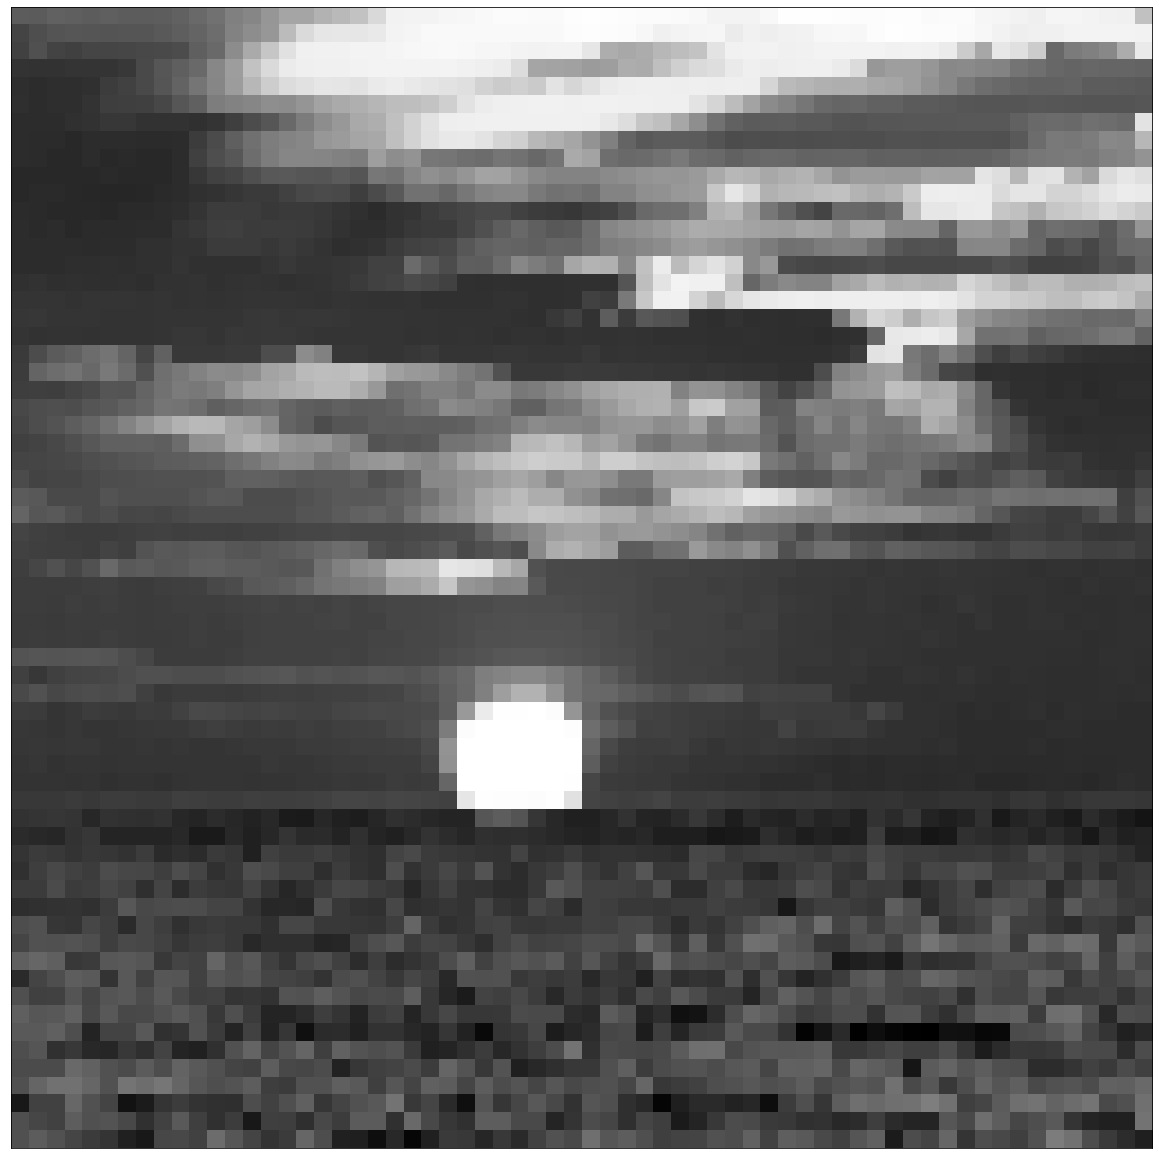

In [6]:
pooled = pool1(flat, 
               k=16, 
               s=16, 
               action=np.max)

plt_im(expand(pooled, 2))

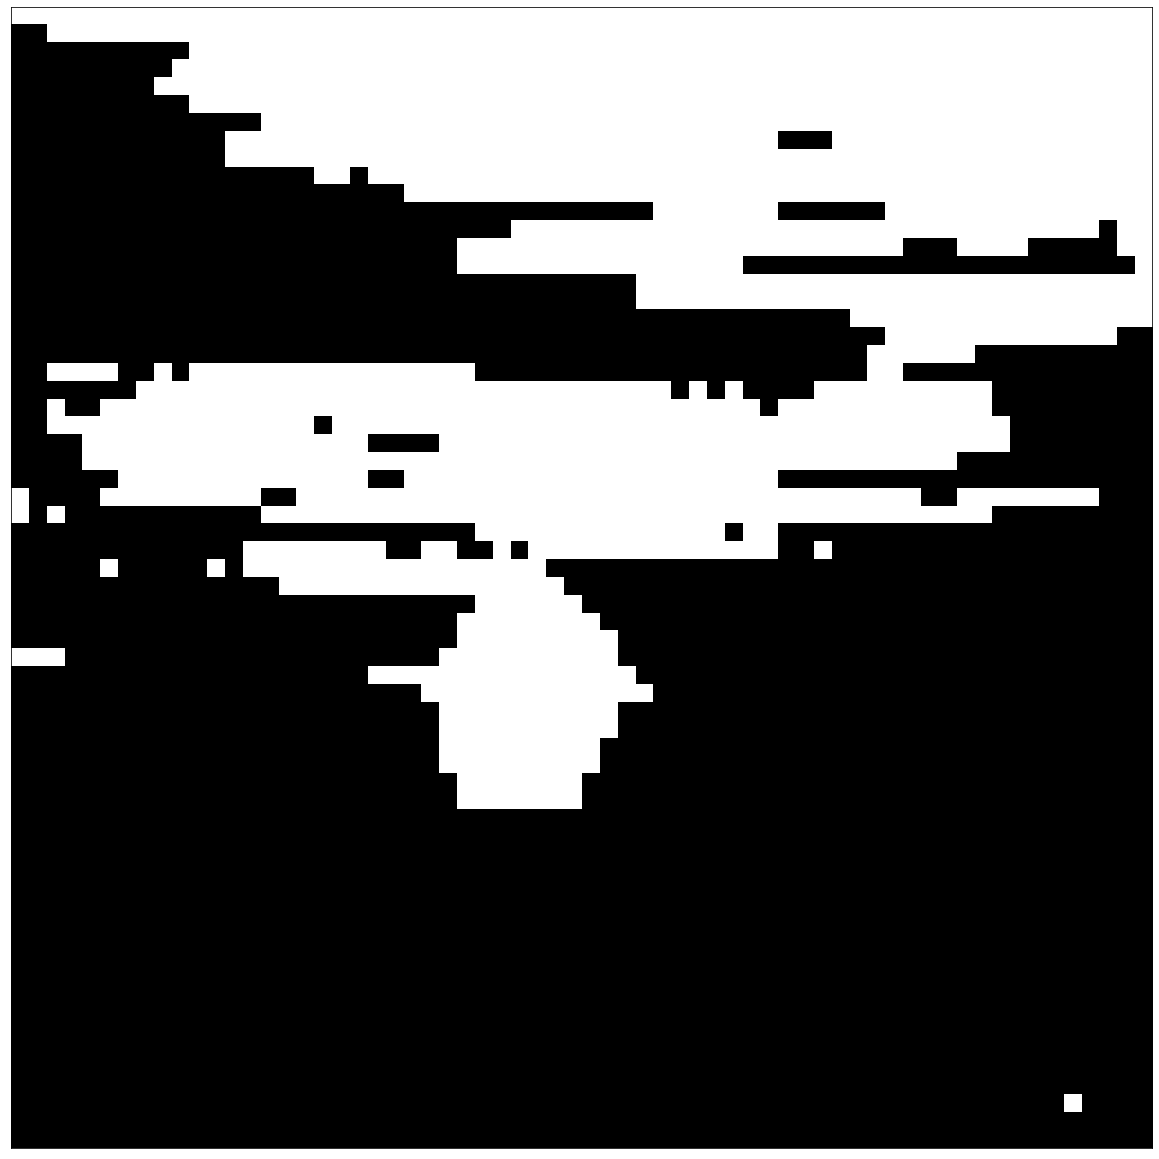

In [7]:
pooled2 = pool1(flat, 
               k=16, 
               s=16, 
               action=lambda x: np.sign(np.average(x) - .5))

plt_im(expand(pooled2, 2))